In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv") 

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
X = df.drop("target", axis=1)
y = df["target"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

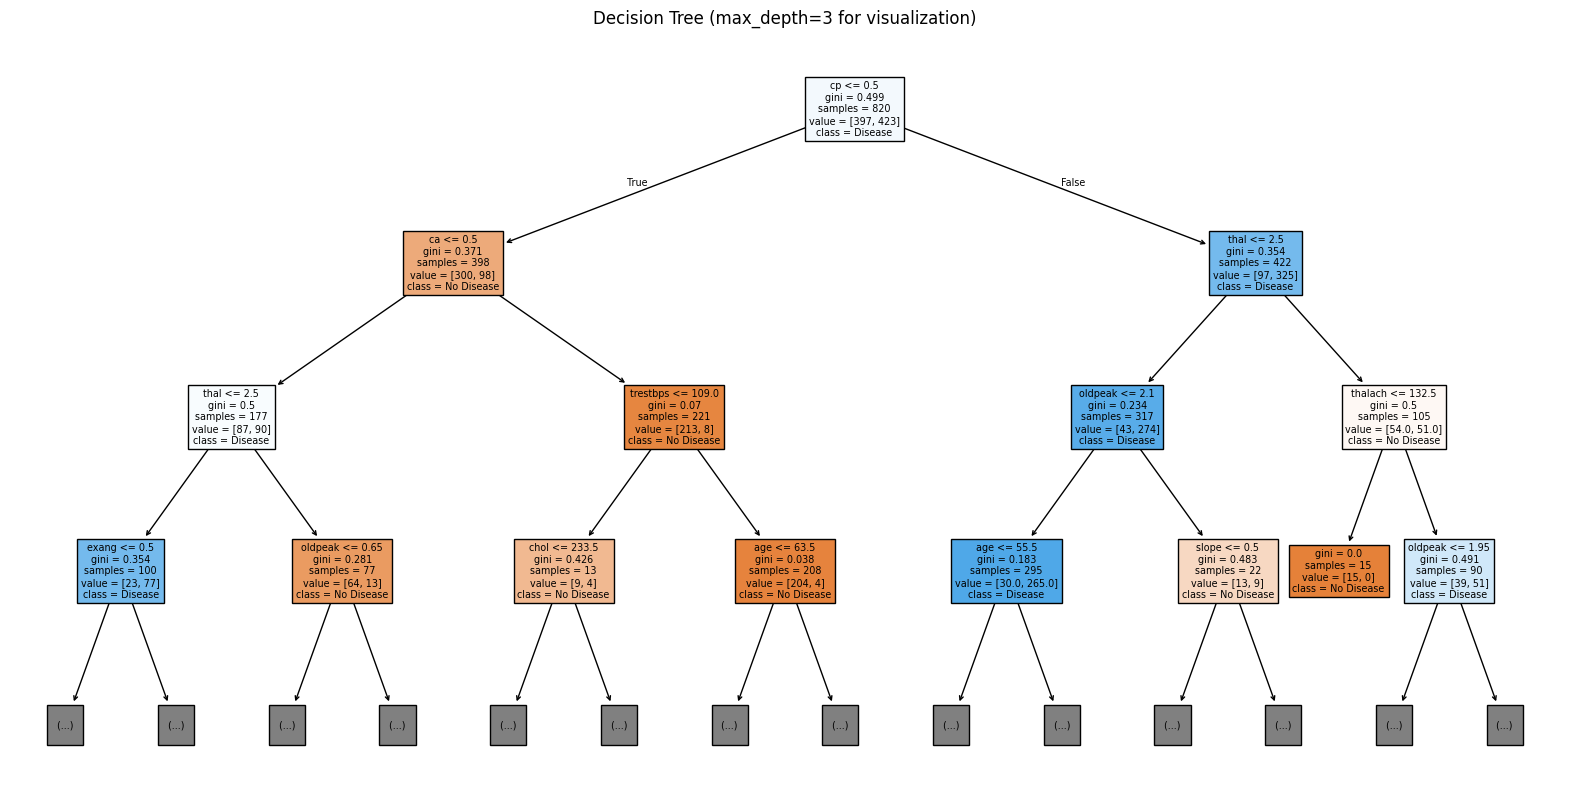

In [6]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, max_depth=3)
plt.title("Decision Tree (max_depth=3 for visualization)")
plt.show()

In [7]:
dt_acc = accuracy_score(y_test, dt_clf.predict(X_test))
print(f"Decision Tree Accuracy: {dt_acc:.4f}")

Decision Tree Accuracy: 0.9854


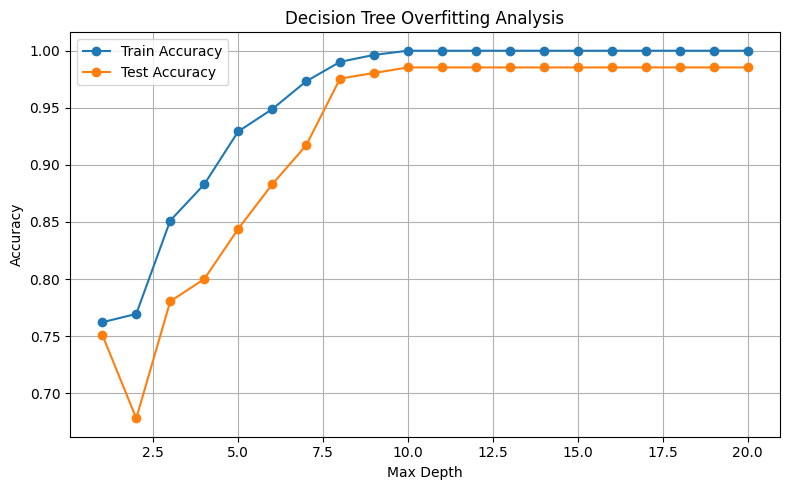

In [8]:
train_accuracies = []
test_accuracies = []
depths = range(1, 21)

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(model.score(X_test, y_test))

plt.figure(figsize=(8, 5))
plt.plot(depths, train_accuracies, label="Train Accuracy", marker="o")
plt.plot(depths, test_accuracies, label="Test Accuracy", marker="o")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Overfitting Analysis")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_clf.predict(X_test))
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.9854


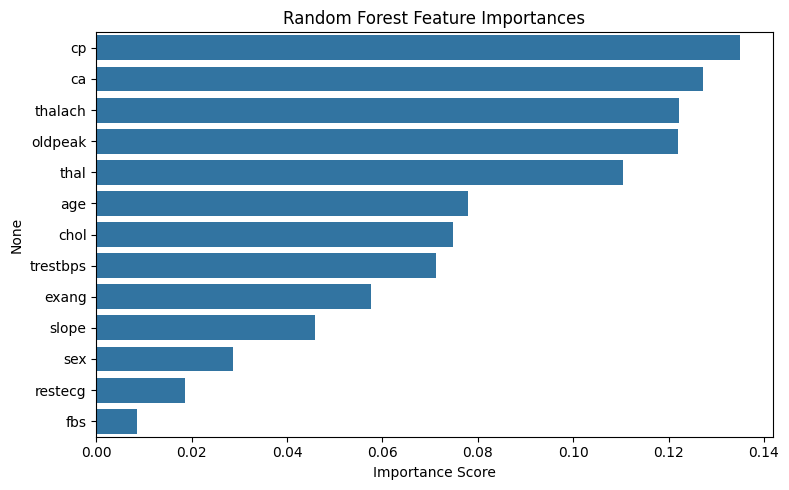

In [10]:
importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [11]:
cv_dt = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5)
cv_rf = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5)

print(f"Cross-validated Accuracy (Decision Tree): {cv_dt.mean():.4f}")
print(f"Cross-validated Accuracy (Random Forest): {cv_rf.mean():.4f}")

Cross-validated Accuracy (Decision Tree): 1.0000
Cross-validated Accuracy (Random Forest): 0.9971
